In [3]:
import numpy as np # linear algebra
import pandas as pd

In [9]:
data = pd.read_csv('Life Expectancy Data (1).csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [13]:
data.drop(['Country','Status'],axis=1,inplace=True)

In [17]:
data.dropna(inplace=True)

In [87]:
dt=data

In [91]:
data['survive'] = (data['Life expectancy '] <= 75).astype(int)
data['survive'] = (data['Life expectancy '] > 75).astype(int)


In [101]:
X=data.iloc[:,:-1]
y=data['survive']

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [104]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [105]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.8181818181818182
Accuracy of Decision Trees 1.0


c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

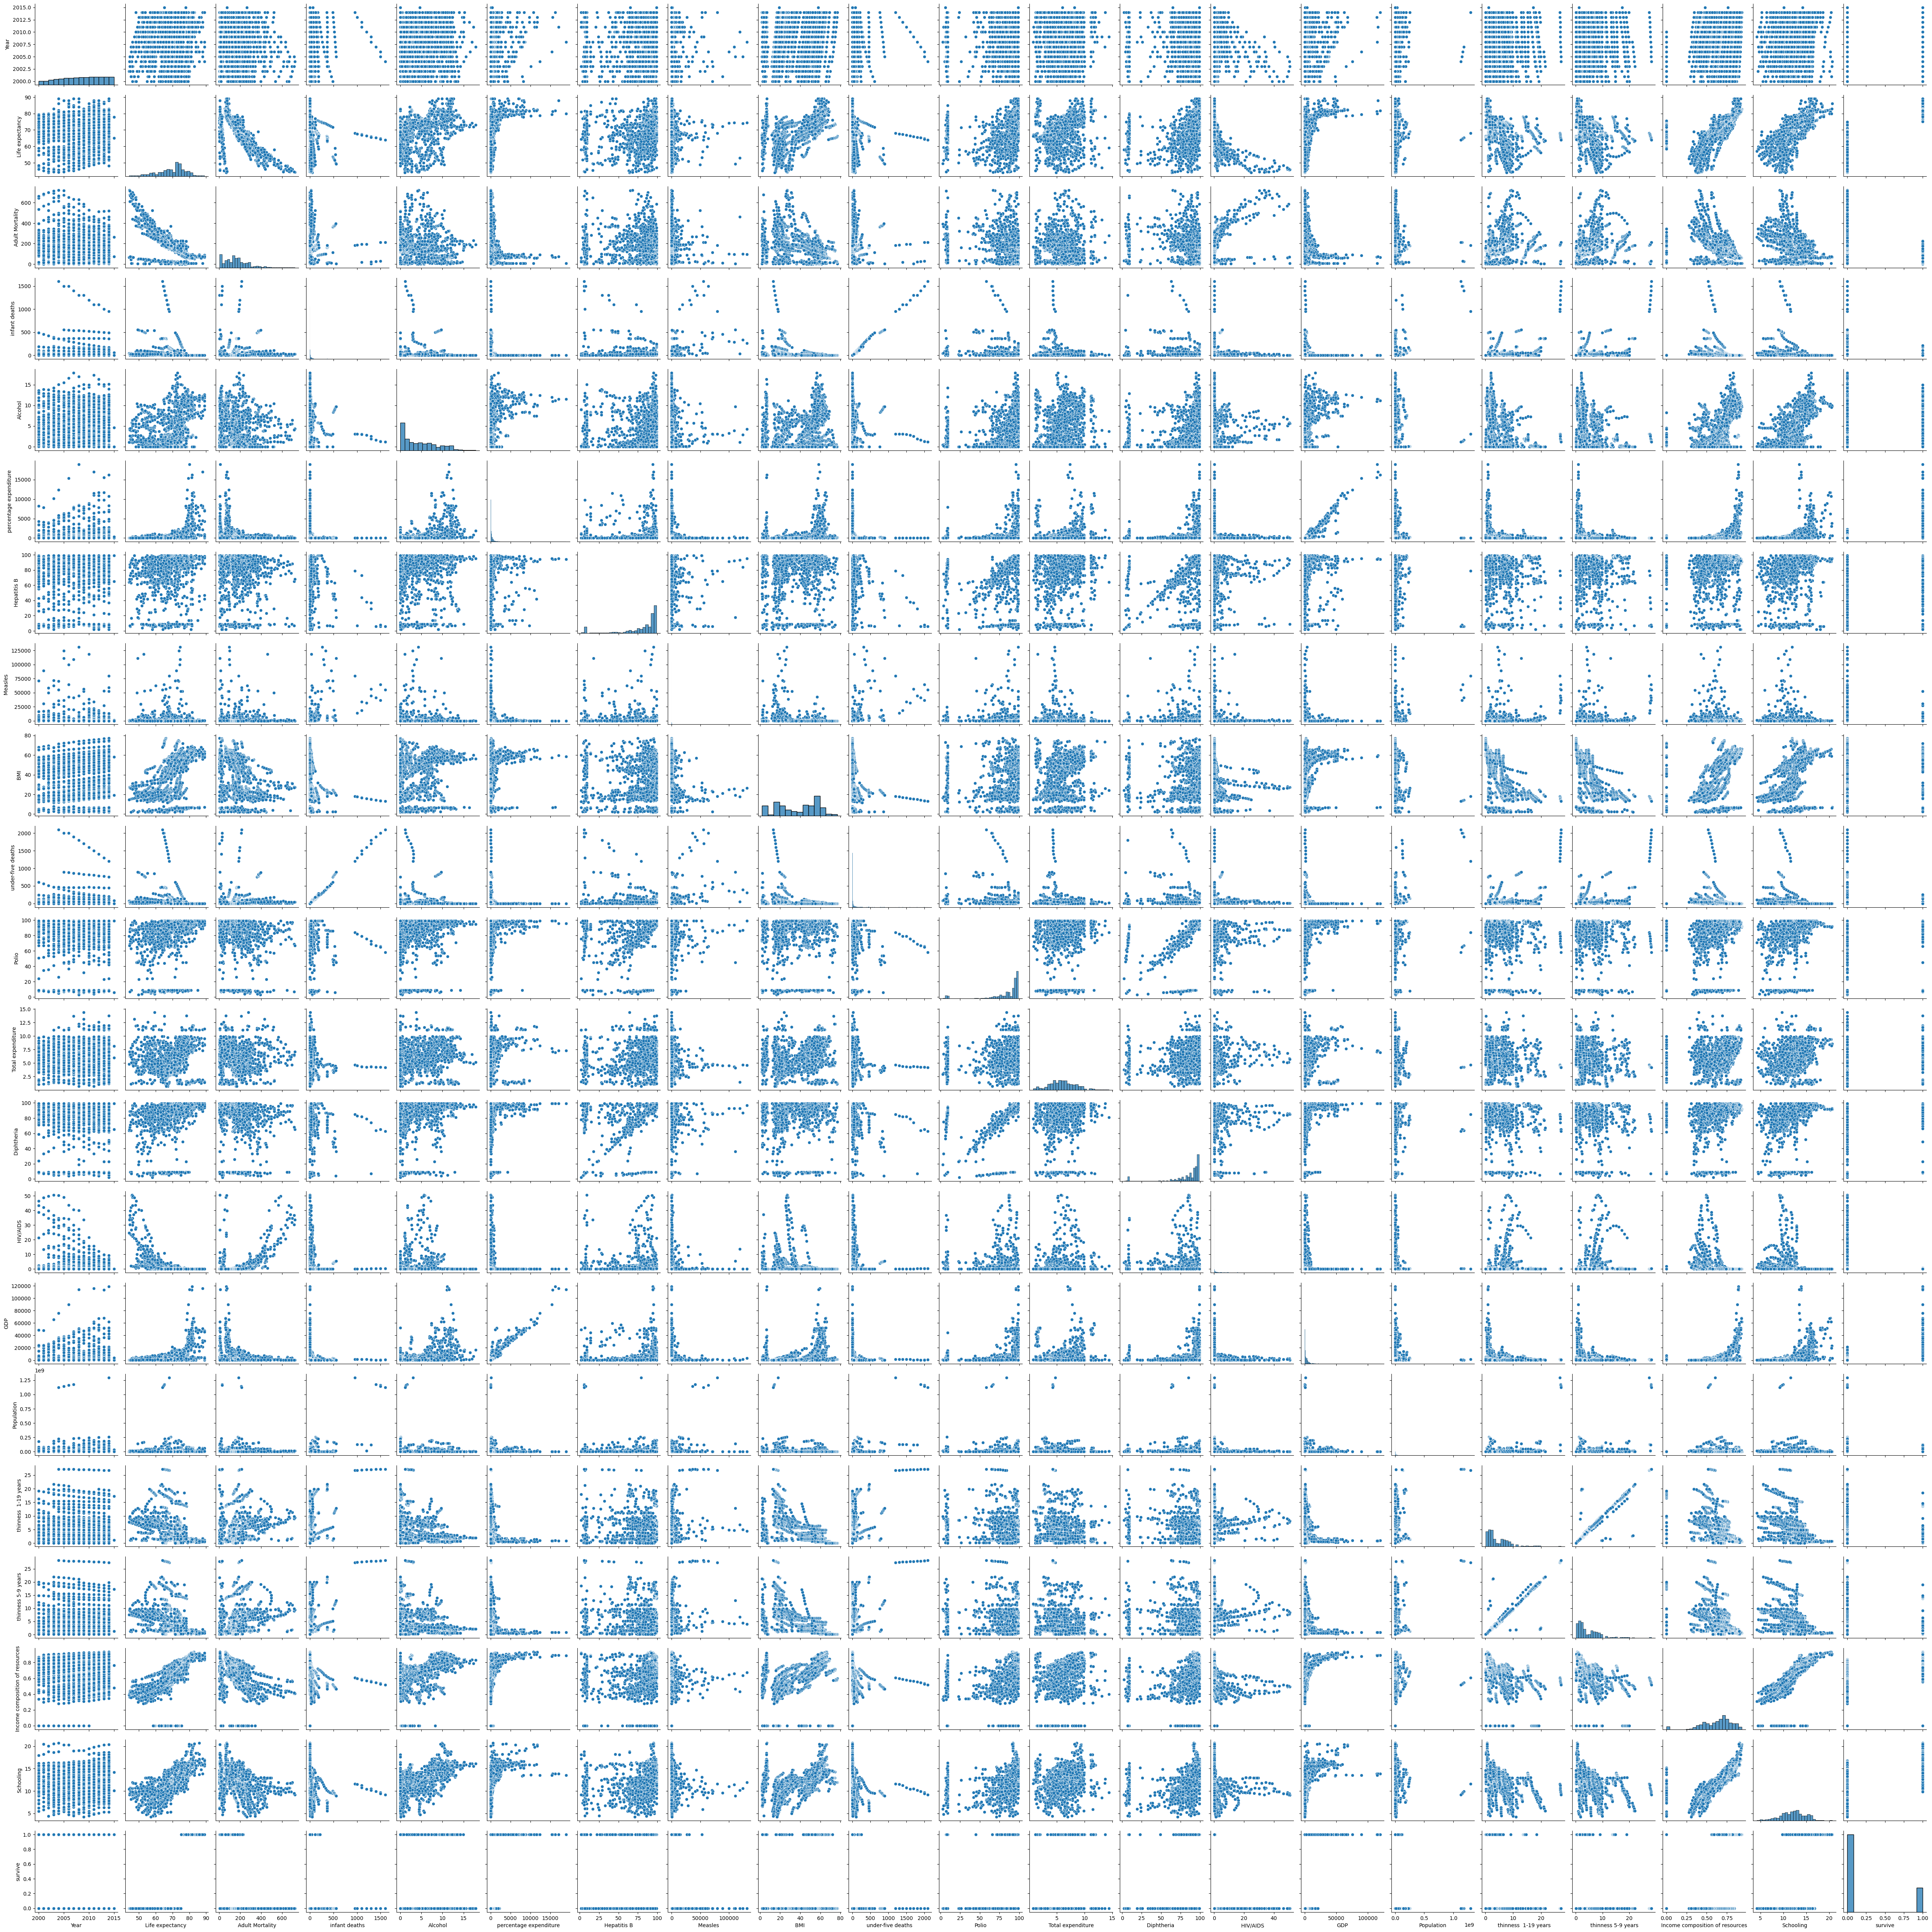

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)

In [109]:
confusion_matrix(y_test,y_pred1)

array([[237,   6],
       [ 54,  33]], dtype=int64)

In [110]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



0   1
0  237   6
1   54  33

In [111]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



0   1
0  243   0
1    0  87

In [112]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2

In [113]:
result.sample(10)

Actual Label  Logistic Regression Prediction  Decision Tree Prediction
1306             0                               0                         0
910              0                               0                         0
1894             0                               0                         0
2132             1                               0                         1
152              0                               0                         0
1993             0                               0                         0
1030             1                               1                         1
832              0                               0                         0
2269             0                               0                         0
759              0                               0                         0